In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
import pandas as pd

df = pd.read_csv('data.csv')
X = df['x'].values.reshape(-1,).astype('float32')
y = df['y'].values.reshape(-1,).astype('float32')

In [64]:
beta = np.array([0.0,0.0,0.0,0.0])
update = np.array([0.1,0.1,0.1,0.1])
f = np.array([0.0,0.0,0.0,0.0])
rate = 0.00005

In [65]:
def calculateE(beta, X, y):
    return np.sum(np.power(y - (beta[0]*np.sin(beta[1]*X-beta[2]) + beta[3]*X), 2))

In [66]:
def calculateF(beta, X, y):
    e = -(y - (beta[0]*np.sin(beta[1]*X-beta[2]) + beta[3]*X))
    f[0] = e.dot(np.sin(beta[1]*X-beta[2]))
    f[1] = e.dot(beta[0]*np.cos(beta[1]*X-beta[2])*X)
    f[2] = e.dot(-beta[0]*np.cos(beta[1]*X-beta[2]))
    f[3] = e.dot(X)
    return f

In [67]:
RSS = [0]
for i in range(10000):
    RSS.append(calculateE(update,X,y))
    beta = update
    update = update - calculateF(update,X,y) * rate

In [68]:
# Questions 1-4
print('The smallest loss achieved: ' + str(min(RSS[1:])))
print('The corresponding learning rate: ' + str(rate))
print('The corresponding ”best” estimated βˆ: ' + str(update))
print('The corresponding number of updates at the ”best” estimated βˆ: ' + str(len(RSS) - 1))

The smallest loss achieved: 22.259373
The corresponding learning rate: 5e-05
The corresponding ”best” estimated βˆ: [1.95654576 0.50671234 2.9917427  0.09249811]
The corresponding number of updates at the ”best” estimated βˆ: 10000


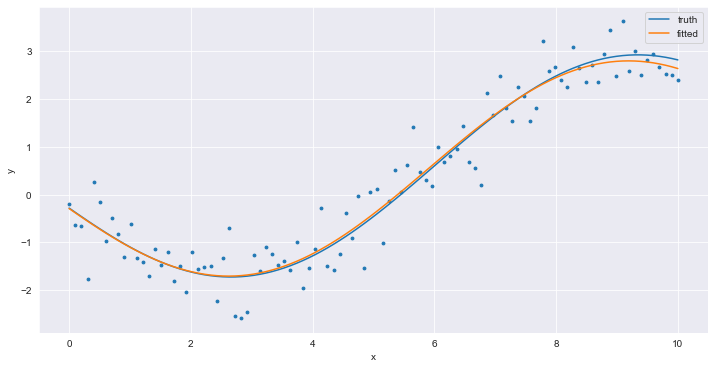

In [69]:
# Question 6
fig,(ax1) = plt.subplots(1, figsize = (12,6))
ax1.scatter (X, y, s = 8)
plt.xlabel('x')
plt.ylabel('y')
y = 2 * np.sin(0.5*X - 3) + 0.1 * X
plt.plot(X,y, label = 'truth')
y = update[0]*np.sin(update[1]*X-update[2])+update[3]*X
plt.plot(X,y, label = 'fitted')
plt.legend()
plt.show()

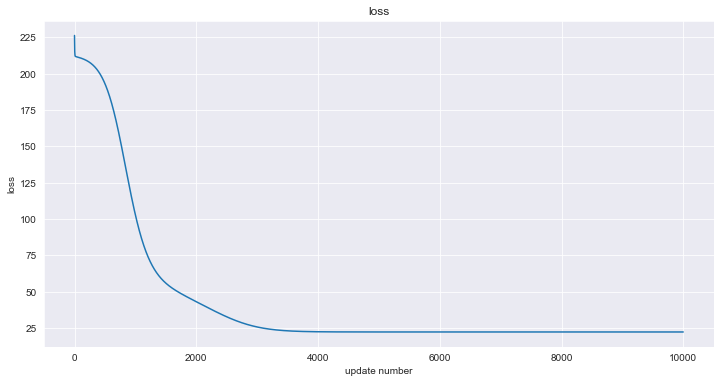

In [72]:
# Question 5
fig,(ax2) = plt.subplots(1, figsize = (12,6))
ax2.set_xlabel('update number'); ax2.set_ylabel('loss')
plt.plot(np.array(RSS[1:]))
plt.title('loss')
plt.show()